In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,BatchNormalization, Dropout
from keras.optimizers import SGD

In [3]:
dataset_path = '../../data/features_age_emotion.csv'
data = pd.read_csv(dataset_path)

In [4]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2853', '2854', '2855', '2856', '2857', '2858', '2859', 'age', 'gender',
       'emotion'],
      dtype='object', length=2863)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2853,2854,2855,2856,2857,2858,2859,age,gender,emotion
0,0.017090,0.024902,0.028809,0.045410,0.074707,0.100098,0.119141,0.110840,0.088867,0.067383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,male,anger
1,0.182129,0.256836,0.350098,0.351074,0.281738,0.240234,0.170410,0.110840,0.089844,0.068359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,male,anger
2,0.015625,0.029297,0.070801,0.104004,0.132324,0.149414,0.131836,0.109863,0.092773,0.076660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,male,anger
3,0.076660,0.113770,0.167969,0.180176,0.173340,0.166992,0.136719,0.109863,0.091309,0.075684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,male,anger
4,0.015137,0.031738,0.036621,0.041504,0.037109,0.026855,0.029297,0.029297,0.035645,0.067383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,male,disgust


In [6]:
data['age'] = pd.cut(data['age'], bins=[20, 29, 39, 49, 59, 69, 79],
                           labels=['twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies'],
                           right=False)

In [7]:
data = data.replace(np.nan, 0)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2853,2854,2855,2856,2857,2858,2859,age,gender,emotion
0,0.017090,0.024902,0.028809,0.045410,0.074707,0.100098,0.119141,0.110840,0.088867,0.067383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fifties,male,anger
1,0.182129,0.256836,0.350098,0.351074,0.281738,0.240234,0.170410,0.110840,0.089844,0.068359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fifties,male,anger
2,0.015625,0.029297,0.070801,0.104004,0.132324,0.149414,0.131836,0.109863,0.092773,0.076660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fifties,male,anger
3,0.076660,0.113770,0.167969,0.180176,0.173340,0.166992,0.136719,0.109863,0.091309,0.075684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fifties,male,anger
4,0.015137,0.031738,0.036621,0.041504,0.037109,0.026855,0.029297,0.029297,0.035645,0.067383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fifties,male,disgust


In [9]:
data['gender'] = data['gender'].replace("female",0)
data['gender'] = data['gender'].replace("male",1)

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2853,2854,2855,2856,2857,2858,2859,age,gender,emotion
0,0.017090,0.024902,0.028809,0.045410,0.074707,0.100098,0.119141,0.110840,0.088867,0.067383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fifties,1,anger
1,0.182129,0.256836,0.350098,0.351074,0.281738,0.240234,0.170410,0.110840,0.089844,0.068359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fifties,1,anger
2,0.015625,0.029297,0.070801,0.104004,0.132324,0.149414,0.131836,0.109863,0.092773,0.076660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fifties,1,anger
3,0.076660,0.113770,0.167969,0.180176,0.173340,0.166992,0.136719,0.109863,0.091309,0.075684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fifties,1,anger
4,0.015137,0.031738,0.036621,0.041504,0.037109,0.026855,0.029297,0.029297,0.035645,0.067383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fifties,1,disgust


In [11]:
data.emotion.value_counts()

emotion
anger           5592
happiness       5368
anxiety/fear    5360
sadness         5332
disgust         5268
neutral         4664
Name: count, dtype: int64

In [12]:
encoded_df = pd.get_dummies(data['emotion'])
df_encoded = pd.concat([data, encoded_df], axis=1)
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,2859,age,gender,emotion,anger,anxiety/fear,disgust,happiness,neutral,sadness
0,0.017090,0.024902,0.028809,0.045410,0.074707,0.100098,0.119141,0.110840,0.088867,0.067383,...,0.0,fifties,1,anger,True,False,False,False,False,False
1,0.182129,0.256836,0.350098,0.351074,0.281738,0.240234,0.170410,0.110840,0.089844,0.068359,...,0.0,fifties,1,anger,True,False,False,False,False,False
2,0.015625,0.029297,0.070801,0.104004,0.132324,0.149414,0.131836,0.109863,0.092773,0.076660,...,0.0,fifties,1,anger,True,False,False,False,False,False
3,0.076660,0.113770,0.167969,0.180176,0.173340,0.166992,0.136719,0.109863,0.091309,0.075684,...,0.0,fifties,1,anger,True,False,False,False,False,False
4,0.015137,0.031738,0.036621,0.041504,0.037109,0.026855,0.029297,0.029297,0.035645,0.067383,...,0.0,fifties,1,disgust,False,False,True,False,False,False


In [13]:
encoded_df = pd.get_dummies(data['age'])
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,disgust,happiness,neutral,sadness,twenties,thirties,forties,fifties,sixties,seventies
0,0.017090,0.024902,0.028809,0.045410,0.074707,0.100098,0.119141,0.110840,0.088867,0.067383,...,False,False,False,False,False,False,False,True,False,False
1,0.182129,0.256836,0.350098,0.351074,0.281738,0.240234,0.170410,0.110840,0.089844,0.068359,...,False,False,False,False,False,False,False,True,False,False
2,0.015625,0.029297,0.070801,0.104004,0.132324,0.149414,0.131836,0.109863,0.092773,0.076660,...,False,False,False,False,False,False,False,True,False,False
3,0.076660,0.113770,0.167969,0.180176,0.173340,0.166992,0.136719,0.109863,0.091309,0.075684,...,False,False,False,False,False,False,False,True,False,False
4,0.015137,0.031738,0.036621,0.041504,0.037109,0.026855,0.029297,0.029297,0.035645,0.067383,...,True,False,False,False,False,False,False,True,False,False


In [14]:
df_encoded.drop(['age','emotion'],axis=1,inplace=True)

In [15]:
df_encoded.iloc[:,2860:].head()

,gender,anger,anxiety/fear,disgust,happiness,neutral,sadness,twenties,thirties,forties,fifties,sixties,seventies
0,1,True,False,False,False,False,False,False,False,False,True,False,False
1,1,True,False,False,False,False,False,False,False,False,True,False,False
2,1,True,False,False,False,False,False,False,False,False,True,False,False
3,1,True,False,False,False,False,False,False,False,False,True,False,False
4,1,False,False,True,False,False,False,False,False,False,True,False,False


In [16]:
df_encoded.shape

(31584, 2873)

In [17]:
X = df_encoded.drop(['gender', 'anger', 'anxiety/fear', 'disgust', 'happiness', 'neutral', 'sadness','twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies'], axis=1).value

Shape of the reduced feature matrix: (31584, 100)


In [18]:
y = df_encoded[['gender', 'anger', 'anxiety/fear', 'disgust', 'happiness', 'neutral', 'sadness','twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies']].values

In [19]:
# X = df_encoded.iloc[:, :-13].values  # Audio features
y_gender = df_encoded.iloc[:, -13:-12].values  # Gender labels
y_emotion = df_encoded.iloc[:, -12:-6].values  # Emotion labels
y_age = df_encoded.iloc[:, -6:].values  # Age labels

In [20]:
y_emotion

array([[ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       ...,
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False],
       [ True, False, False, False, False, False]])

In [21]:
y_gender

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [22]:
y_age

array([[False, False, False,  True, False, False],
       [False, False, False,  True, False, False],
       [False, False, False,  True, False, False],
       ...,
       [False,  True, False, False, False, False],
       [False,  True, False, False, False, False],
       [False,  True, False, False, False, False]])

In [23]:
X_train, X_val_test, y_gender_train, y_gender_val_test, y_emotion_train, y_emotion_val_test, y_age_train, y_age_val_test = train_test_split(X, y_gender, y_emotion, y_age, test_size=0.3, random_state=30)
X_test, X_val, y_gender_test, y_gender_val, y_emotion_test, y_emotion_val, y_age_test, y_age_val = train_test_split(X_val_test, y_gender_val_test, y_emotion_val_test, y_age_val_test, test_size=0.5, random_state=30)


In [24]:
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer = Dense(2048, activation='relu')(input_layer)
hidden_layer = BatchNormalization()(hidden_layer)
hidden_layer = Dense(1024, activation='relu')(hidden_layer)
hidden_layer = Dense(512, activation='relu')(hidden_layer)
hidden_layer = Dense(64, activation='relu')(hidden_layer)
hidden_layer = Dropout(0.25)(hidden_layer)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-09-06 22:21:26.931568: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-06 22:21:26.931603: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
gender_output = Dense(y_gender_train.shape[1], activation='sigmoid', name='gender')(hidden_layer)

In [26]:
emotion_output = Dense(y_emotion_train.shape[1], activation='softmax', name='emotion')(hidden_layer)

In [27]:
age_output = Dense(y_age_train.shape[1], activation='softmax', name='age')(hidden_layer)

In [28]:
model = Model(inputs=input_layer, outputs=[gender_output, emotion_output, age_output])


In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 2048)         206848      ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 2048)        8192        ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 dense_1 (Dense)                (None, 1024)         2098176     ['batch_normalization[0][0]']

In [30]:
opt = SGD(learning_rate=0.0005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=opt,
              loss={'gender': 'binary_crossentropy',
                    'emotion': 'categorical_crossentropy',
                    'age': 'categorical_crossentropy'},
              metrics={'gender': 'accuracy',
                       'emotion': 'accuracy',
                       'age': 'accuracy'})

In [31]:
model.fit(X_train, {'gender': y_gender_train,
                    'emotion': y_emotion_train,
                    'age': y_age_train},
          validation_data=(X_val, {'gender': y_gender_val,
                                    'emotion': y_emotion_val,
                                    'age': y_age_val}),
          epochs=200, batch_size=32)

Epoch 1/200


2023-09-06 22:21:27.421838: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-06 22:21:27.829874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


691/691 [==============================] - ETA: 0s - loss: 3.8821 - gender_loss: 0.6973 - emotion_loss: 1.6576 - age_loss: 1.5273 - gender_accuracy: 0.5373 - emotion_accuracy: 0.3098 - age_accuracy: 0.3440

2023-09-06 22:21:46.270794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


691/691 [==============================] - 21s 26ms/step - loss: 3.8821 - gender_loss: 0.6973 - emotion_loss: 1.6576 - age_loss: 1.5273 - gender_accuracy: 0.5373 - emotion_accuracy: 0.3098 - age_accuracy: 0.3440 - val_loss: 3.6872 - val_gender_loss: 0.6810 - val_emotion_loss: 1.5368 - val_age_loss: 1.4693 - val_gender_accuracy: 0.5629 - val_emotion_accuracy: 0.3645 - val_age_accuracy: 0.3710
Epoch 2/200
691/691 [==============================] - 18s 26ms/step - loss: 3.6969 - gender_loss: 0.6810 - emotion_loss: 1.5352 - age_loss: 1.4807 - gender_accuracy: 0.5615 - emotion_accuracy: 0.3669 - age_accuracy: 0.3641 - val_loss: 3.6075 - val_gender_loss: 0.6725 - val_emotion_loss: 1.4853 - val_age_loss: 1.4498 - val_gender_accuracy: 0.5842 - val_emotion_accuracy: 0.3883 - val_age_accuracy: 0.3721
Epoch 3/200
691/691 [==============================] - 18s 26ms/step - loss: 3.6271 - gender_loss: 0.6726 - emotion_loss: 1.4919 - age_loss: 1.4625 - gender_accuracy: 0.5783 - emotion_accuracy: 0.38

KeyboardInterrupt: 

In [32]:
model.save("MLP-final.keras")

In [33]:
# Evaluate the model
losses = model.evaluate(X_test, {'gender': y_gender_test,
                                 'emotion': y_emotion_test,
                                 'age': y_age_test})
print('Gender Loss:', losses[1])
print('Emotion Loss:', losses[2])
print('Age Loss:', losses[3])
print('Gender Accuracy:', losses[4])
print('Emotion Accuracy:', losses[5])
print('Age Accuracy:', losses[6])


149/149 [==============================] - 2s 16ms/step - loss: 0.8766 - gender_loss: 0.1369 - emotion_loss: 0.3272 - age_loss: 0.4124 - gender_accuracy: 0.9544 - emotion_accuracy: 0.9033 - age_accuracy: 0.8858
Gender Loss: 0.13690374791622162
Emotion Loss: 0.32722344994544983
Age Loss: 0.4124250113964081
Gender Accuracy: 0.9544111490249634
Emotion Accuracy: 0.9033347368240356
Age Accuracy: 0.8858168125152588


In [34]:
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [35]:
y_pred = model.predict(X_test)

 35/149 [======>.......................] - ETA: 0s

2023-09-06 23:06:58.122785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


149/149 [==============================] - 1s 3ms/step


In [36]:
y_gender_pred = (y_pred[0] > 0.5).astype(int)
y_emotion_pred = np.argmax(y_pred[1], axis=1)
y_age_pred = np.argmax(y_pred[2], axis=1)


In [37]:
set(y_age_pred)

{0, 1, 2, 3, 4, 5}

In [38]:
y_gender_test.shape

(4738, 1)

In [39]:
y_gender_pred.shape

(4738, 1)

In [40]:
gender_cm = confusion_matrix(y_gender_test, y_gender_pred)
emotion_cm = confusion_matrix(np.argmax(y_emotion_test, axis=1), y_emotion_pred)
age_cm = confusion_matrix(np.argmax(y_age_test, axis=1), y_age_pred)

In [41]:
gender_f1 = f1_score(y_gender_test, y_gender_pred, average='macro')
emotion_f1 = f1_score(np.argmax(y_emotion_test, axis=1), y_emotion_pred, average='macro')
age_f1 = f1_score(np.argmax(y_age_test, axis=1), y_age_pred, average='macro')

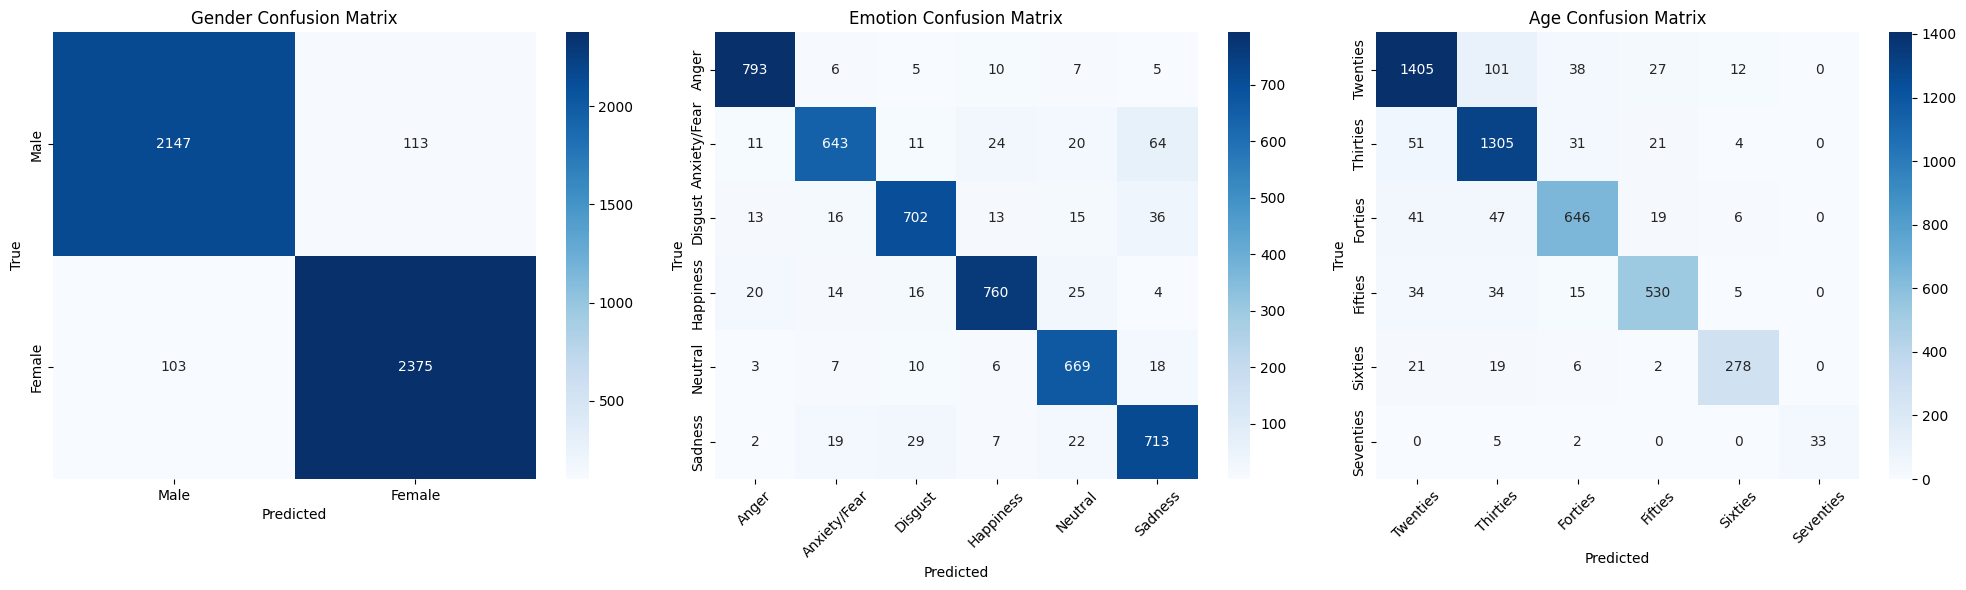

In [42]:
labels_gender = ['Male', 'Female']
labels_emotion = ['Anger', 'Anxiety/Fear', 'Disgust', 'Happiness', 'Neutral', 'Sadness']
labels_age = ['Twenties', 'Thirties', 'Forties', 'Fifties', 'Sixties', 'Seventies']


fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.heatmap(gender_cm, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_xticks(np.arange(len(labels_gender)) + 0.5)
axes[0].set_yticks(np.arange(len(labels_gender)) + 0.5)
axes[0].set_xticklabels(labels_gender)
axes[0].set_yticklabels(labels_gender)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Gender Confusion Matrix')

sns.heatmap(emotion_cm, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_xticks(np.arange(len(labels_emotion)) + 0.5)
axes[1].set_yticks(np.arange(len(labels_emotion)) + 0.5)
axes[1].set_xticklabels(labels_emotion, rotation=45)
axes[1].set_yticklabels(labels_emotion)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Emotion Confusion Matrix')

sns.heatmap(age_cm, annot=True, cmap='Blues', fmt='d', ax=axes[2])
axes[2].set_xticks(np.arange(len(labels_age)) + 0.5)
axes[2].set_yticks(np.arange(len(labels_age)) + 0.5)
axes[2].set_xticklabels(labels_age, rotation=45)
axes[2].set_yticklabels(labels_age)
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')
axes[2].set_title('Age Confusion Matrix')

plt.tight_layout()
plt.show()

In [43]:
print('Gender F1 Score:', gender_f1)
print('Emotion F1 Score:', emotion_f1)
print('Age F1 Score:', age_f1)

Gender F1 Score: 0.9543053294553742
Emotion F1 Score: 0.9026527712361093
Age F1 Score: 0.88475905141938
